In [29]:
import pandas as pd
import sys  
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from timestamp import aukioloajat
from sisään_uloskäynnit import *
from reittien_erottelu import *
# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

In [30]:
df = pd.read_csv('/home/jovyan/work/projekti-2-team-fox/laurijutut/projekti2.csv')

df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
13890901,13890901,b'4996252679627069957',b'2020-06-01 03:00:05.469336+00:00',635,1064,0,0
13890902,13890902,b'4996252679627069957',b'2020-06-01 03:00:06.47926+00:00',681,760,0,0
13890903,13890903,b'4996252679627069957',b'2020-06-01 03:00:08.507118+00:00',622,991,0,0
13890904,13890904,b'4996252679627069957',b'2020-06-01 03:00:09.547553+00:00',644,1066,0,0


Number of missing variables in table
 Unnamed: 0    0
node_id       0
timestamp     0
x             0
y             0
z             0
q             0
dtype: int64
------------------------------
Unique values in columns

uniques in x 10532
uniques in y 7899
uniques in z 3
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100 400   0]
uniques in q [0]
------------------------------
Number of nodes: 32
------------------------------
Outliers

Data with outliers:  13890906
Ouliers removed:     376791
Data after:  13514115
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


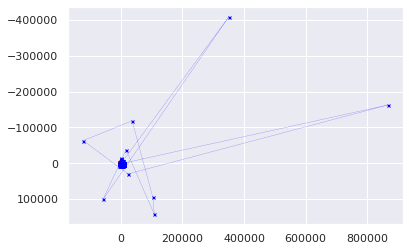

In [31]:

df = find_outliers(df)
%time

In [32]:
%time
df = clean_dataframe(df)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs


In [33]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['index'], axis = 1)

In [34]:
df

,node_id,timestamp,x,y
0,1,2020-06-24 15:20:08.533,2762,-257
1,1,2020-06-24 15:20:08.620,2870,-344
2,1,2020-06-24 15:20:09.623,2916,-344
3,1,2020-06-24 15:20:09.623,2894,-254
4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...
11611069,32,2020-05-31 21:59:14.541,593,988
11611070,32,2020-05-31 21:59:28.456,701,668
11611071,32,2020-05-31 21:59:39.968,744,1130
11611072,32,2020-05-31 21:59:46.893,799,204


In [36]:
df = df[df.node_id != 13]
df = df[df.node_id != 14]
df = df[df.node_id != 18]
df = df[df.node_id != 32]
df

,node_id,timestamp,x,y
0,1,2020-06-24 15:20:08.533,2762,-257
1,1,2020-06-24 15:20:08.620,2870,-344
2,1,2020-06-24 15:20:09.623,2916,-344
3,1,2020-06-24 15:20:09.623,2894,-254
4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...
10837392,31,2020-09-30 12:24:13.062,2711,-311
10837393,31,2020-09-30 12:24:50.062,2718,-318
10837394,31,2020-09-30 12:25:36.062,2721,-324
10837395,31,2020-09-30 12:26:03.062,2719,-323


In [38]:
df = df.reset_index()
df

,level_0,index,node_id,timestamp,x,y
0,0,0,1,2020-06-24 15:20:08.533,2762,-257
1,1,1,1,2020-06-24 15:20:08.620,2870,-344
2,2,2,1,2020-06-24 15:20:09.623,2916,-344
3,3,3,1,2020-06-24 15:20:09.623,2894,-254
4,4,4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...,...,...
9869172,9869172,10837392,31,2020-09-30 12:24:13.062,2711,-311
9869173,9869173,10837393,31,2020-09-30 12:24:50.062,2718,-318
9869174,9869174,10837394,31,2020-09-30 12:25:36.062,2721,-324
9869175,9869175,10837395,31,2020-09-30 12:26:03.062,2719,-323


In [9]:
grid_size = 40
df1 = xy_to_grid(df, df.x, df.y, grid_size)
df1.head()

,node_id,timestamp,x,y,viikonpäivä,kellonaika,x_grid,y_grid,grid_id
0,1,2020-06-24 15:20:08.533,2762,-257,2,15:20:08.533000,26,11,466
1,1,2020-06-24 15:20:08.620,2870,-344,2,15:20:08.620000,27,11,467
2,1,2020-06-24 15:20:09.623,2916,-344,2,15:20:09.623000,28,11,468
3,1,2020-06-24 15:20:09.623,2894,-254,2,15:20:09.623000,28,11,468
4,1,2020-06-24 15:20:10.116,2888,-188,2,15:20:10.116000,28,12,508


In [12]:
in_x, in_y = sisään(df1)
out_x, out_y = ulos(df1)

In [13]:
# Muokataan sisäänkäynnin ja kassojen sijainnit ID-muotoon.
in_ID = xy_to_ID(in_x,in_y, grid_size)
out_ID = xy_to_ID(out_x,out_y, grid_size)

In [18]:
# Haetaan uniikit id:t
u_in_ID = in_ID.unique()
u_out_ID = out_ID.unique()

reitit = erottele_reitit(df1, u_in_ID, u_out_ID)

reitit = poista_lyhyet_reitit(reitit, 50)
df1 = reitit_dataframeksi(reitit)


In [19]:
df1

,ajokerta,timestamp,node_id,ID,x,y
0,1,2020-06-24 15:20:08.620,1,467,27,11
1,1,2020-06-24 15:20:09.623,1,468,28,11
2,1,2020-06-24 15:20:09.623,1,468,28,11
3,1,2020-06-24 15:20:10.116,1,508,28,12
4,1,2020-06-24 15:20:11.086,1,508,28,12
...,...,...,...,...,...,...
50469,140,2020-07-18 12:53:04.795,1,908,28,22
50470,140,2020-07-18 12:53:04.795,1,908,28,22
50471,140,2020-07-18 12:53:05.795,1,908,28,22
50472,140,2020-07-18 12:53:05.795,1,908,28,22


In [20]:
df1['viikonpäivä'] = df1.timestamp.dt.dayofweek
df1['kellonaika'] = df1.timestamp.dt.time

df1

,ajokerta,timestamp,node_id,ID,x,y,viikonpäivä,kellonaika
0,1,2020-06-24 15:20:08.620,1,467,27,11,2,15:20:08.620000
1,1,2020-06-24 15:20:09.623,1,468,28,11,2,15:20:09.623000
2,1,2020-06-24 15:20:09.623,1,468,28,11,2,15:20:09.623000
3,1,2020-06-24 15:20:10.116,1,508,28,12,2,15:20:10.116000
4,1,2020-06-24 15:20:11.086,1,508,28,12,2,15:20:11.086000
...,...,...,...,...,...,...,...,...
50469,140,2020-07-18 12:53:04.795,1,908,28,22,5,12:53:04.795000
50470,140,2020-07-18 12:53:04.795,1,908,28,22,5,12:53:04.795000
50471,140,2020-07-18 12:53:05.795,1,908,28,22,5,12:53:05.795000
50472,140,2020-07-18 12:53:05.795,1,908,28,22,5,12:53:05.795000


In [21]:
corrMatrix = df1.corr()
print (corrMatrix)

             ajokerta  node_id        ID         x         y  viikonpäivä
ajokerta     1.000000      NaN  0.049044 -0.083819  0.050945     0.049876
node_id           NaN      NaN       NaN       NaN       NaN          NaN
ID           0.049044      NaN  1.000000 -0.349310  0.999636     0.067579
x           -0.083819      NaN -0.349310  1.000000 -0.374447    -0.087820
y            0.050945      NaN  0.999636 -0.374447  1.000000     0.069402
viikonpäivä  0.049876      NaN  0.067579 -0.087820  0.069402     1.000000


In [22]:
import seaborn as sn
import matplotlib.pyplot as plt


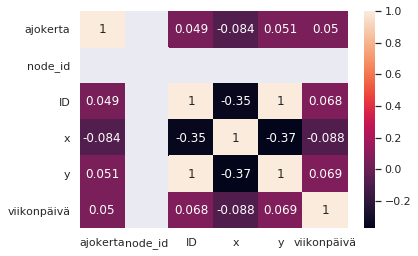

In [23]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [27]:
maze = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
                [0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
                [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
                [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                [1 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1],
                [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                [1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1],
                [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1],
                [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1],
                [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1],
                [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1],
                [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1],
                [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1],
                [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1],
                [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1],
                [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

([], <a list of 0 Text yticklabel objects>)

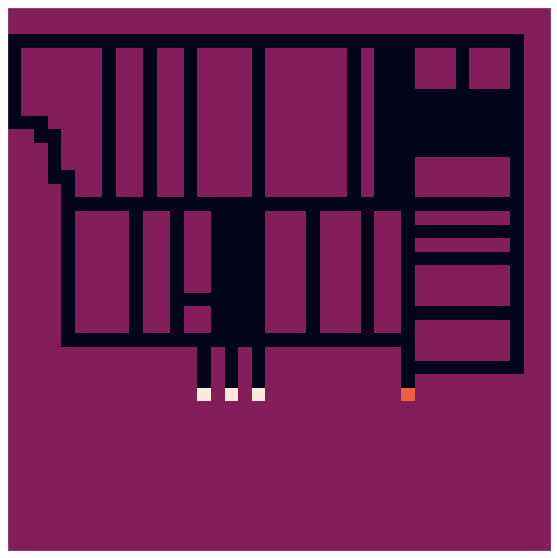

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(maze)
plt.xticks([])
plt.yticks([])